<a href="https://colab.research.google.com/github/NyxDestinos/fetal-health-classification/blob/main/Kaggle_Competition(RandomForest_%7C_Acc_~90_82_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Competition
(using RandomForest Model | Accuracy : ~90.82%)

# Data Preparing

In [ ]:
!wget https://raw.githubusercontent.com/Natthapolmnc/HealthClassification/main/dat/train.csv

--2021-02-03 15:11:54--  https://raw.githubusercontent.com/Natthapolmnc/HealthClassification/main/dat/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 378565 (370K) [text/plain]
Saving to: ‘train.csv.6’

train.csv.6         100%[===================>] 369.69K  --.-KB/s    in 0.04s   

2021-02-03 15:11:54 (10.1 MB/s) - ‘train.csv.6’ saved [378565/378565]



In [ ]:
!wget https://raw.githubusercontent.com/Natthapolmnc/HealthClassification/main/dat/test.csv

--2021-02-03 15:11:54--  https://raw.githubusercontent.com/Natthapolmnc/HealthClassification/main/dat/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92446 (90K) [text/plain]
Saving to: ‘test.csv.6’

test.csv.6          100%[===================>]  90.28K  --.-KB/s    in 0.01s   

2021-02-03 15:11:55 (6.94 MB/s) - ‘test.csv.6’ saved [92446/92446]



In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('train.csv')
data_x_test_for_sub = pd.read_csv('test.csv')

df = pd.DataFrame(data=data)



fetal_encode = {'Normal':1, 'Suspect':2, 'Pathological':3}
df["fetal_health"].replace(fetal_encode, inplace=True)

In [ ]:
df

,id,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,0,125.942938,0.005,0.001,0.001,0.000,0.0,0.000,72.822009,0.9,9.0,4.8,31.225482,125.707004,158.292062,1.0,0.0,137.275989,141.350224,142.981122,3.0,0.0,1
1,1,133.364184,0.007,0.455,0.003,0.003,0.0,0.000,25.219689,1.7,0.0,13.3,106.588247,68.415156,174.797482,7.0,1.0,146.328592,131.461296,137.154832,41.0,0.0,1
2,2,128.703640,0.000,0.001,0.007,0.007,0.0,0.002,64.741364,3.1,0.0,0.0,181.381829,49.296554,230.788810,10.0,1.0,104.433608,82.913871,112.790567,14.0,-1.0,3
3,3,128.156307,0.008,0.010,0.003,0.005,0.0,0.000,27.114477,1.9,0.0,1.1,141.740290,56.676800,198.048958,12.0,0.0,136.702882,121.936760,136.088071,59.0,0.0,1
4,4,144.780854,0.001,0.000,0.006,0.000,0.0,0.000,34.897611,0.9,2.0,10.8,35.672934,123.848287,159.760220,0.0,0.0,150.112437,148.654901,150.329725,2.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1695,151.242649,0.000,0.000,0.000,0.000,0.0,0.000,76.977291,0.3,31.0,5.4,11.029699,146.300175,156.887774,1.0,0.0,153.618401,155.158142,153.937242,0.0,1.0,2
1696,1696,126.487162,0.001,0.001,0.008,0.010,0.0,0.000,63.092084,1.1,0.0,4.1,100.483215,65.022126,166.068564,5.0,2.0,114.367867,114.660582,115.078120,13.0,0.0,1
1697,1697,127.751639,0.000,0.000,0.008,0.008,0.0,0.000,18.148119,2.5,0.0,19.1,82.927635,75.355604,159.285435,5.0,0.0,122.000170,116.330332,121.246322,20.0,0.0,1
1698,1698,113.789175,0.006,0.047,0.009,0.000,0.0,0.000,27.109971,2.4,0.0,13.5,126.405165,54.065073,184.993666,6.0,0.0,117.641243,115.250729,117.838303,13.0,0.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 23 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   id                                                      1700 non-null   int64  
 1   baseline value                                          1700 non-null   float64
 2   accelerations                                           1700 non-null   float64
 3   fetal_movement                                          1700 non-null   float64
 4   uterine_contractions                                    1700 non-null   float64
 5   light_decelerations                                     1700 non-null   float64
 6   severe_decelerations                                    1700 non-null   float64
 7   prolongued_decelerations                                1700 non-null   float64
 8   abnormal_short_term_variability       

In [ ]:
label = df[['fetal_health']]
df = df.drop(columns=["id","fetal_health"])

test_id = data_x_test_for_sub['id']
data_x_test_for_sub = data_x_test_for_sub.drop(columns=['id'])


In [ ]:
data_x_test_for_sub

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,149.475864,0.000,0.000,0.001,0.001,0.0,0.0,65.197193,1.9,9.0,27.6,129.551008,56.104395,186.719015,2.0,0.0,151.496581,147.776682,154.923532,9.0,1.0
1,131.628876,0.000,0.000,0.001,0.008,0.0,0.0,37.139848,1.3,4.0,14.6,81.001769,71.265422,152.646964,4.0,0.0,136.784457,130.075786,134.021422,24.0,1.0
2,136.458165,0.000,0.000,0.002,0.000,0.0,0.0,51.909731,0.7,0.0,14.8,82.067135,71.906708,154.011139,4.0,0.0,144.005311,146.864404,146.309971,3.0,1.0
3,129.570942,0.003,0.005,0.006,0.003,0.0,0.0,52.286501,3.0,0.0,3.3,76.891485,85.748262,162.438962,6.0,0.0,138.926751,130.272551,134.531056,15.0,0.0
4,144.837033,0.005,0.014,0.003,0.000,0.0,0.0,66.956799,0.8,0.0,10.9,71.734575,119.321429,193.303827,1.0,0.0,158.425033,158.460509,155.605744,11.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,143.184703,0.000,0.000,0.003,0.000,0.0,0.0,67.031182,0.3,4.0,10.5,24.881584,135.272248,158.147859,1.0,0.0,145.364741,146.518156,146.201897,1.0,0.0
422,121.072946,0.008,0.000,0.000,0.002,0.0,0.0,23.992852,1.6,0.0,8.4,77.465533,79.016845,159.391181,3.0,0.0,136.181823,126.628327,129.030716,21.0,1.0
423,120.725527,0.000,0.020,0.003,0.006,0.0,0.0,20.788086,4.7,0.0,15.7,151.354657,49.763727,197.557832,8.0,0.0,116.253966,111.667928,119.052482,23.0,0.0
424,129.798328,0.000,0.004,0.000,0.000,0.0,0.0,73.236967,0.2,32.0,7.3,21.660527,122.033721,147.297288,1.0,0.0,128.297960,133.242593,132.494696,3.0,0.0


**Split Data**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.25, random_state=42)

In [ ]:
X_train.shape

(1275, 21)

# **Generate Profiling (using Pandas-Profiling)**

In [ ]:
!pip install pandas-profiling==2.7.1

In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title="fetal_health_report")
profile.to_widgets()

In [ ]:
profile

In [ ]:
profile.to_file("your_report.html")

# Data Visualization

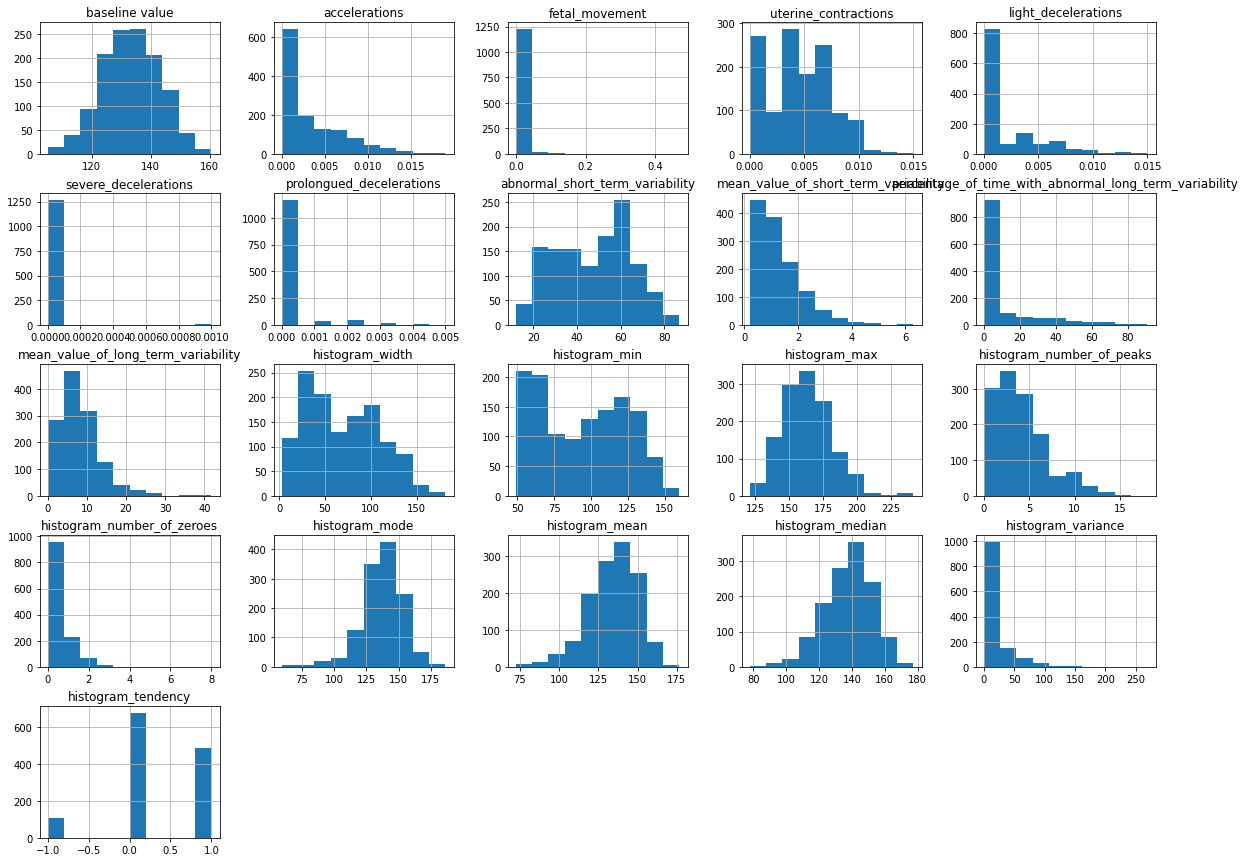

In [ ]:
import matplotlib.pyplot as plt
X_train.hist(figsize=(20,15))
plt.show()

In [ ]:
df_corr = X_train.corr(method='pearson')
df_corr

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
baseline value,1.000000,-0.077771,-0.025071,-0.169529,-0.162974,-0.045618,-0.101982,0.295225,-0.279525,0.297652,-0.031758,-0.131742,0.340974,0.272264,-0.092694,0.024099,0.701250,0.710720,0.773998,-0.127621,0.312142
accelerations,-0.077771,1.000000,0.062919,0.080133,-0.097555,-0.043369,-0.116640,-0.262762,0.207059,-0.369506,-0.163784,0.300864,-0.163890,0.383335,0.181382,-0.021797,0.239251,0.270704,0.277637,0.135503,0.053475
fetal_movement,-0.025071,0.062919,1.000000,-0.067438,0.058377,-0.011731,0.239186,-0.137900,0.165039,-0.075189,0.024029,0.186377,-0.163331,0.141716,0.188139,0.002241,-0.061685,-0.093733,-0.078021,0.211627,-0.041350
uterine_contractions,-0.169529,0.080133,-0.067438,1.000000,0.309662,0.015060,0.088786,-0.224619,0.280512,-0.300039,-0.069188,0.132614,-0.121346,0.086883,0.072934,0.065094,-0.131222,-0.215295,-0.167067,0.230624,-0.051365
light_decelerations,-0.162974,-0.097555,0.058377,0.309662,1.000000,0.098280,0.224252,-0.097692,0.572440,-0.278089,-0.255629,0.531121,-0.560989,0.237432,0.419187,0.263358,-0.354238,-0.529420,-0.388360,0.556259,-0.013486
severe_decelerations,-0.045618,-0.043369,-0.011731,0.015060,0.098280,1.000000,0.025834,0.019825,0.035835,-0.034214,-0.034703,0.048039,-0.077670,-0.025756,-0.007992,0.039918,-0.214021,-0.152900,-0.153544,0.149515,-0.051009
prolongued_decelerations,-0.101982,-0.116640,0.239186,0.088786,0.224252,0.025834,1.000000,0.032232,0.279912,-0.141539,-0.218705,0.278723,-0.289202,0.133994,0.239460,0.041705,-0.435430,-0.493583,-0.460544,0.508994,-0.233233
abnormal_short_term_variability,0.295225,-0.262762,-0.137900,-0.224619,-0.097692,0.019825,0.032232,1.000000,-0.428787,0.443130,-0.327502,-0.227071,0.253318,-0.080821,-0.157785,-0.152082,0.066358,0.068006,0.115404,-0.131407,-0.009448
mean_value_of_short_term_variability,-0.279525,0.207059,0.165039,0.280512,0.572440,0.035835,0.279912,-0.428787,1.000000,-0.480145,0.043062,0.642707,-0.610574,0.401856,0.498971,0.272790,-0.304555,-0.448025,-0.334356,0.545230,-0.071014
percentage_of_time_with_abnormal_long_term_variability,0.297652,-0.369506,-0.075189,-0.300039,-0.278089,-0.034214,-0.141539,0.443130,-0.480145,1.000000,-0.164849,-0.439068,0.418501,-0.269668,-0.272560,-0.116452,0.174446,0.229882,0.187591,-0.284981,0.045718


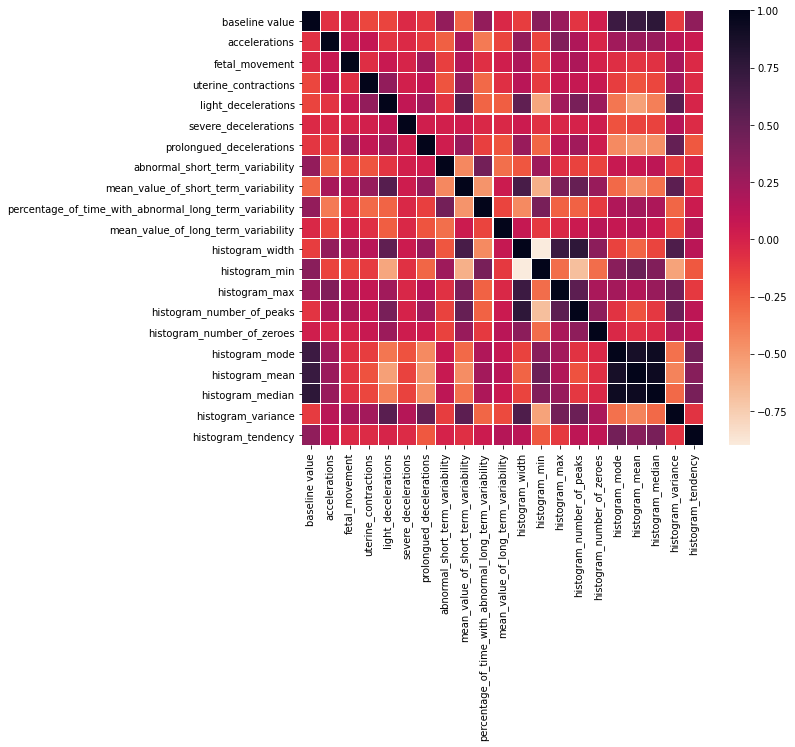

In [ ]:
import seaborn as sns 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(df_corr, ax = ax, cmap ="rocket_r", linewidths = 0.1) 

baseline value : ['histogram_median']
histogram_width : ['histogram_number_of_peaks']
histogram_number_of_peaks : ['histogram_width']
histogram_mode : ['histogram_mean', 'histogram_median']
histogram_mean : ['histogram_mode', 'histogram_median']
histogram_median : ['baseline value', 'histogram_mode', 'histogram_mean']


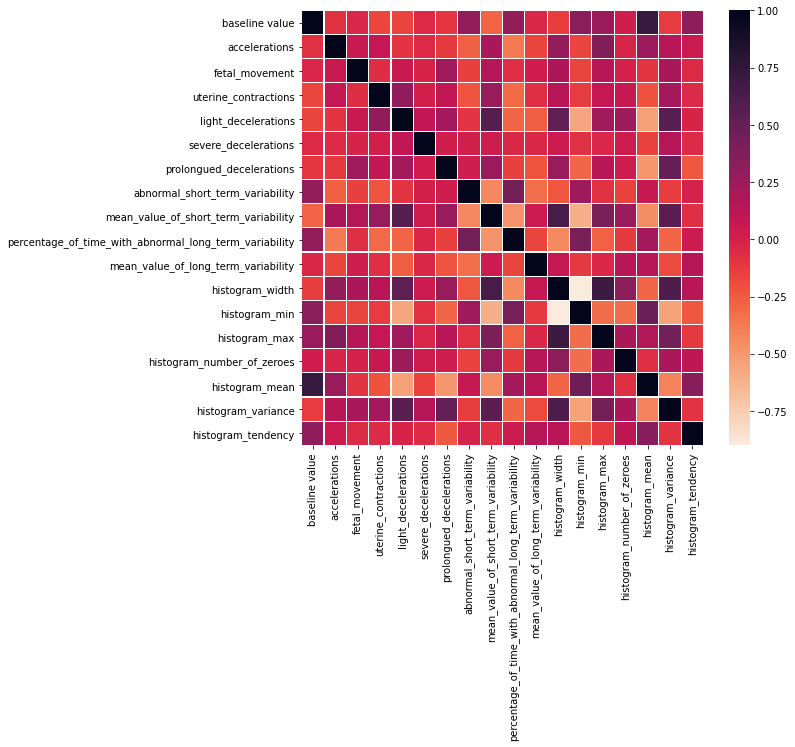

In [ ]:
temp_df = X_train
for i in df_corr.columns:
  temp = [x for x in df_corr.columns if df_corr[i][x] > 0.75 and i != x]
  if len(temp) > 0:
    print(i,':', temp)
temp_df = temp_df.drop(columns=['histogram_median', 'histogram_mode', 'histogram_number_of_peaks'])
df_corr_2 = temp_df.corr(method='pearson')
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(df_corr_2, ax = ax, cmap ="rocket_r", linewidths = 0.1) 

In [ ]:
for i in df_corr_2.columns:
  temp = [x for x in df_corr_2.columns if df_corr_2[i][x] > 0.75 and i != x]
  if len(temp) > 0:
    print(i,':', temp)

In [ ]:
X_train = X_train.drop(columns=['histogram_median', 'histogram_mode', 'histogram_number_of_peaks'])
X_test = X_test.drop(columns=['histogram_median', 'histogram_mode', 'histogram_number_of_peaks'])
data_x_test_for_sub = data_x_test_for_sub.drop(columns=['histogram_median', 'histogram_mode', 'histogram_number_of_peaks'])

In [ ]:
X_train.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_zeroes,histogram_mean,histogram_variance,histogram_tendency
1177,125.496257,0.000,0.002,0.007,0.006,0.0,0.002,66.644685,2.5,0.0,0.0,127.891468,62.334958,193.127870,0.0,93.972618,28.0,0.0
1261,131.200673,0.002,0.000,0.009,0.001,0.0,0.001,33.767253,1.2,0.0,12.4,105.052601,61.944897,167.331217,1.0,122.913346,116.0,1.0
208,127.933324,0.000,0.000,0.004,0.000,0.0,0.000,37.069571,0.8,20.0,7.1,22.183412,115.264399,138.936881,0.0,125.461032,1.0,0.0
1030,136.897402,0.000,0.000,0.007,0.003,0.0,0.000,57.692268,1.9,0.0,6.5,101.543548,63.971787,167.427157,2.0,137.019287,14.0,1.0
1329,150.310756,0.000,0.002,0.000,0.000,0.0,0.000,80.251221,0.4,28.0,6.6,34.003231,129.547834,166.059732,0.0,152.674722,1.0,0.0
755,137.050850,0.000,0.000,0.000,0.003,0.0,0.000,47.614890,0.8,0.0,9.7,54.129186,104.215634,158.497207,1.0,145.475138,15.0,1.0
58,127.746518,0.000,0.019,0.003,0.003,0.0,0.003,29.075324,2.2,0.0,7.2,142.396931,54.358503,196.588644,0.0,106.067417,126.0,0.0
486,139.555263,0.000,0.000,0.004,0.000,0.0,0.000,19.170285,2.2,0.0,17.8,45.436286,111.746264,157.161071,0.0,141.848399,6.0,1.0
1350,140.880290,0.000,0.000,0.008,0.000,0.0,0.000,79.392736,0.3,20.0,8.5,25.958274,123.558318,149.949792,0.0,141.668848,1.0,1.0
576,119.805566,0.000,0.000,0.003,0.006,0.0,0.002,60.600913,1.3,0.0,9.4,82.799308,68.560563,153.585758,1.0,100.570401,56.0,0.0


# Evaluate Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42, ccp_alpha=0.01, max_depth=10)

forest_clf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.01, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = forest_clf.predict(X_test)

In [ ]:
clf_rep = classification_report(y_test,y_pred , output_dict=True)
    
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.93      0.98      0.96       345
           2       0.68      0.59      0.63        46
           3       0.91      0.62      0.74        34

    accuracy                           0.91       425
   macro avg       0.84      0.73      0.77       425
weighted avg       0.90      0.91      0.90       425

Accuracy: 0.908235294117647


In [ ]:
y_pred_sub = forest_clf.predict(data_x_test_for_sub)

In [ ]:
fetal_decode = {1:'Normal', 2:'Suspect', 3:'Pathological'}
y_pred_decode = [fetal_decode[x] for x in y_pred_sub]
d = {'id': test_id, 'fetal_health': y_pred_decode}

In [ ]:
df_sub = pd.DataFrame(data=d)
df_sub

,id,fetal_health
0,0,Normal
1,1,Normal
2,2,Normal
3,3,Normal
4,4,Normal
...,...,...
421,421,Suspect
422,422,Normal
423,423,Normal
424,424,Suspect


In [ ]:
df_sub.to_csv('submission.csv', index = False)

In [ ]:
from google.colab import files

files.download("submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>